# Lab Assignment 11: Clustering

In this assignment, you will be working with some age (measured in years) and height (measured in fractional feet.  So, for instance, 5 feet 6 inches would be 5.5 since there are 12 inches in a foot).  The data is admittedly made up, but I chose these interpretations to demonstrate something very important about clustering.  

In the data, there is a feature called `true_cluster`.  Usually, this column would never be available to you (after all, clustering is a form of unsupervised learning). Do not, I repeat, do not use this column in your clustering.  This column has been included for the sole purpose of comparing clustering methods to ground truth.



In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

## Question 1 (10 Marks)

Load the `age_height_data.csv` data into a pandas dataframe.  Plot a scatterplot of the two variables and colour the dots according to their `true_cluster_label` value for reference.  

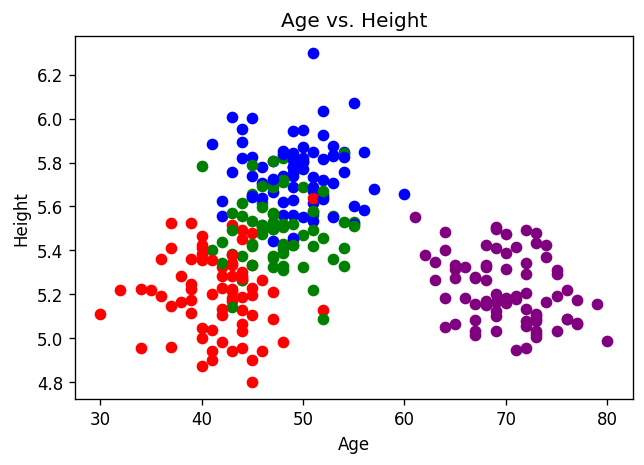

In [121]:

def scatter_color(X, yp):
    
    samples = np.array(X.age).shape[0]

    fig, ax = plt.subplots(dpi = 120)
    ax.set_title("Age vs. Height")
    ax.set_xlabel("Age (Years)")
    ax.set_ylabel("Height (Feet)")
    
    color = ""
    
    for i, r in X.iterrows():
        color = "";
        if yp[i] == 0:
            color = "red"
        elif yp[i] == 1:
            color = "green"  
            
        elif yp[i] == 2:
            color = "blue"
        
        else:
            color = "purple"
       
        ax.scatter(r.age, r.height, c = color)


X = pd.read_csv("age_height_data.csv")
y = X.true_cluster_label;
#X = X.drop(columns=["true_cluster_label"])

scatter_color(X, y)



## Question 2 (10 Marks)

There are 4 true clusters in the data.  Create a K-means pipeline using sklearn's `KMeans` with `n_clusters=4`.  Predict on the data and plot the data according to the predicted cluster label.

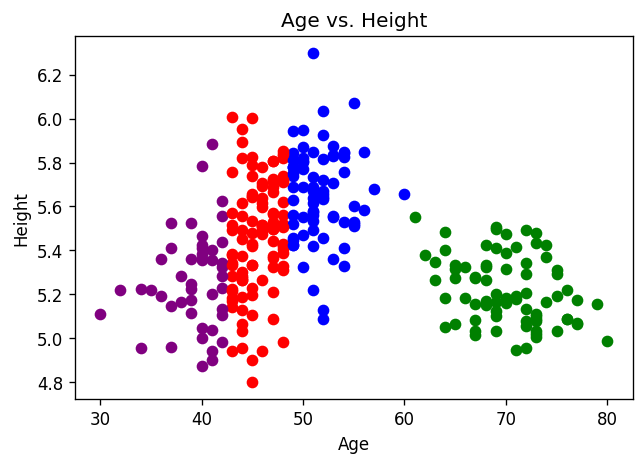

In [125]:
classifier = KMeans(n_clusters=4).fit(X)
yp = classifier.predict(X)

scatter_color(X, yp)


## Question 3 (10 Marks)

You should see that the left most blob is clustered in a way that the decision line between two clusters is nearly vertical.  Does this look like the true cluster labels?  If not, what might explain this?  **Hint**: How is age measured?  How is height measured?  Are they comparable scales?

Write your answer below.

Height is measured in feet. Age is measured in years. Age spans a range of 50 while height only spans a range of 1.4.
As a result the distanced used by kmeans means that age has more weight and will be minimized over height. Since there is no 
scaling the results of cluster are not accurate.

## Question 4 (10 Marks)

Add a `StandardScaler` to your pipeline and create the plot again.  Comment on if the scaling helped the clustering in so far as the predicted clusters look more like the true clusters.

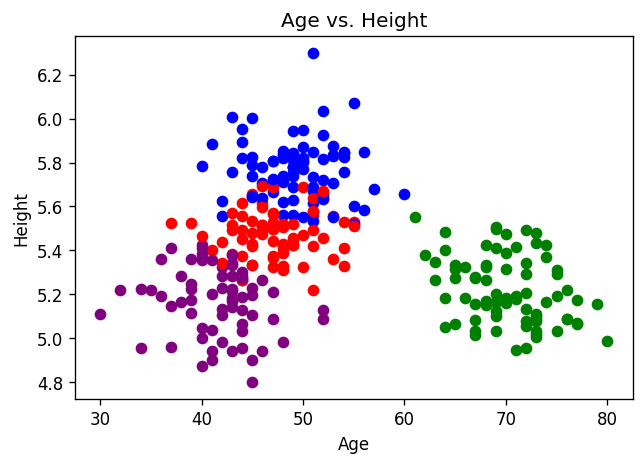

In [126]:
pipeline = Pipeline([('Standard Scaler', StandardScaler()), ('KMeans', KMeans(n_clusters=4))])
model = pipeline.fit(X)
yp = model.predict(X)
scatter_color(X, yp)



## Question 5 (10 Marks)

In applied clustering, we never know how many clusters exist in the data.  That is something we have to decide.  One method used to determine the number of clusters is to use an elbow plot.

An elbow plot is made by fitting the clustering algorithm for a variety of cluster sizes (usually between 2 and $\sqrt{N}$ clusters, where $N$ is the number of rows in the data.  Each time we fit the clustering algorithm with a different number of clusters, we record the value of the objective function for the algorithm (in sklearn's `KMeans`, this can be done by calling `Kmeans.score`).  The number of clusters is determined by looking for an "elbow" in the data; a point where the algorithm's objective function stops decreasing quickly with additional numbers of clusters.

Hint: If you have a pipeline with a clustering step called `kmeans` in it, you can change the number of clusters, do a new fit, and get the score like so:

```
# Suppose clusters is desired number of clusters,
# and your pipeline is called kmn_pipe, which has
# a k-means step called kmeans:
kmn_pipe.named_steps['kmeans'].set_params(n_clusters = clusters)
kmn_pipe.fit(X)
newscore = (-kmn_pipe.score(X))
```

Create an elbow plot for this data.

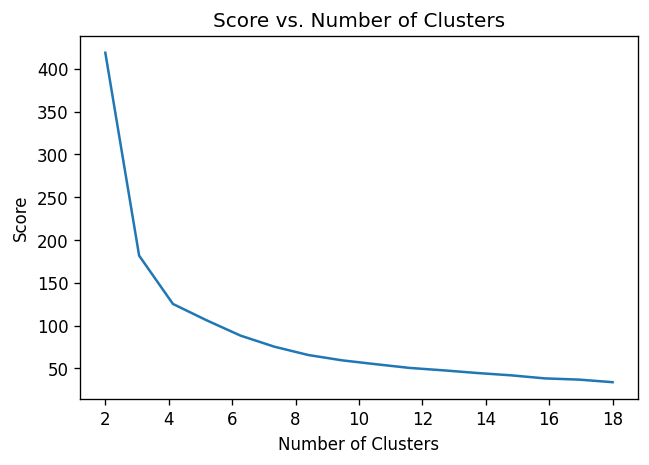

In [128]:

pipeline = Pipeline([('Standard Scaler', StandardScaler()), ('KMeans', KMeans(n_clusters=4))])
num = np.array(X.age).shape[0]
score = []


for i in range(2, int(np.ceil(np.sqrt(num)))):
     pipeline.named_steps['KMeans'].set_params(n_clusters = i)
     pipeline.fit(X)
     score.append(-pipeline.score(X))
     

x = np.linspace(2, int(np.ceil(np.sqrt(num))), len(score))
fig, ax = plt.subplots(dpi = 120)
ax.set_title("Score vs. Number of Clusters")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Score")
ax.plot(x, score)



## Question 6 (10 Marks)

Where is the "elbow" for this data?  Justify your answer.  Pretend as if you didn't know there were really 4 clusters in the data.

THe elbow in the data is when the number of cluser is equal to 4. At this point less variance is being added for every new cluster which causes
the model to level out. At this point adding addition clusters doesn't seem to add to the model or yield better results. This becomes a waste of the computer's computational resources.


## Question 7 (40 Marks)

Read the accompanying paper entitled **Clustering - What Both Theoreticians and Practitioners are Doing Wrong**, then answer the following short answer questions.  Write your answers in the space provided.


1)  Why does the author think the two requirements of clustering conflict with one another?
    
    The two requirements for clustering are:
    - Every pair of close by elements share the same cluster
    - Dissimilar elements are separated into the same cluster
This is due to the impossibility theorem postulated by Klienberg.

Consider a line of points. Each point on the line is gradually changing.
 You can say neighbor in the cluster would be same, but the difference gets amplified when comparing. This would result in the entire line being in a cluster.
 The start and end point in the cluster would not be similar which violates the first rule.
    
    
2) Summarize the author's criticisms of the theoretician's approach to clustering.

The author criticises the theoretician's approach of clustering as theoretician create new types of clustering algorithms
but fail to differentiate the properties of new clustering algorithm from current existing ones. Also, they fail to form 
an argument showing the new proposed clustering algorithm is more suitable in specific applications making their use  obscure.
Also  theoreticians spend significant time researching approximation algorithms for clustering objective minimization when most users
do not care about such function. 

3) Summarize the author's criticisms of the practitioner's approach to clustering.

The author criticises the practitioner's approach of clustering as practitioner often select the clustering approach that is 
by factors such as: user friendly, popular in the field, and runs quickly. Practitioners often fail to consider the 
underlining theory behind the clustering algorithms and their impact on the information they are clustering.


4) As a practitioner, how might you go about thinking about which algorithm to use for clustering from now on?

The most important lesson is that no global optimal clustering algorithm exists. Therefore, special consideration must 
be applied when understanding the requirements the distinguishes the clustering method and the range of task that they are good
for. This is reinforced by the fact clustering algorithms are never 'better' than other algorithm. The user can not tell beforehand 
the numbering of the clustering or if more or less clustering.  If possible it is recommended that a practitioner interacts with the 
algorithm designer. 


Answer here!